In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn import datasets

iris_data = datasets.load_iris()

In [8]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
inp = iris_data['data']
out = iris_data['target']

In [13]:
col_names = iris_data['feature_names']
col_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
inp_df = pd.DataFrame(inp, columns = col_names)
out_df = pd.DataFrame(out, columns = ['target'])

In [19]:
iris = pd.concat([inp_df, out_df], axis = 1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
iris.target = iris.target.map({0:'setosa',1:'versicolor',2:'verginica'})

In [30]:
iris.target.value_counts()

setosa        50
versicolor    50
verginica     50
Name: target, dtype: int64

# Train-Test split

In [33]:
from sklearn.model_selection import train_test_split

In [58]:
X = iris.drop('target', axis = 1)
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.25, stratify = y)

# Model Building

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [94]:
dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

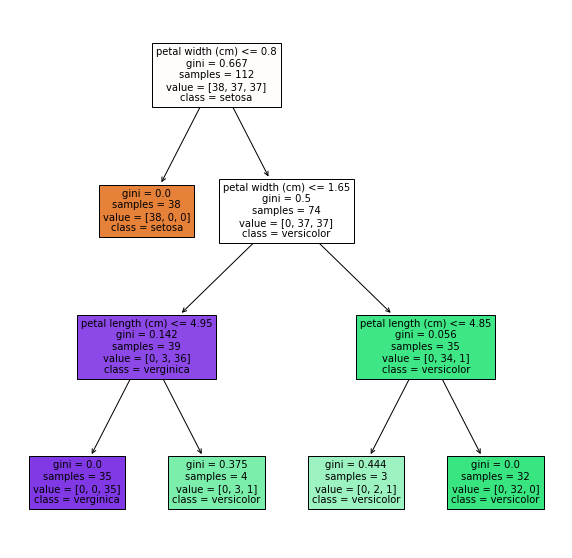

In [95]:
plt.figure(figsize = (10,10))
plot_tree(dt_model,feature_names=col_names,class_names=['setosa','versicolor','verginica'],filled=True)
plt.show()

In [96]:
plot_tree?

# Prediction

In [97]:
y_pred = dt_model.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'setosa', 'setosa', 'verginica', 'setosa',
       'verginica', 'versicolor', 'setosa', 'verginica', 'versicolor',
       'verginica', 'versicolor', 'verginica', 'versicolor', 'verginica',
       'versicolor', 'verginica', 'verginica', 'verginica', 'verginica',
       'versicolor', 'versicolor', 'verginica', 'setosa', 'setosa',
       'setosa', 'verginica', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'verginica', 'setosa', 'setosa', 'verginica',
       'versicolor', 'versicolor'], dtype=object)

# Evaluation
#### Accuracy Score

In [98]:
dt_model.score(X_test,y_test)

0.9736842105263158

#### precision, recall, confusion_matrix, classification report

In [91]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

In [92]:
# precsion score

precision_score(y_test, y_pred, average = 'macro')

0.9761904761904763

In [93]:
# recall score

recall_score(y_test, y_pred, average = 'macro')

0.9743589743589745

### Confusion Matrix

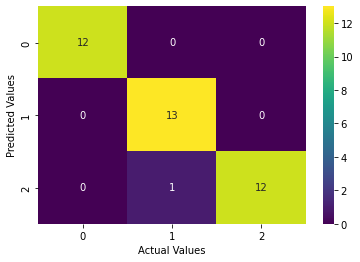

In [85]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'viridis')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Classification Report

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
   verginica       0.93      1.00      0.96        13
  versicolor       1.00      0.92      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

